In [14]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [15]:
with open('database/df.pkl', 'rb') as f:
    df = pd.read_pickle(f)

In [16]:
df_item = df[df['item_nbr'] == 870938]

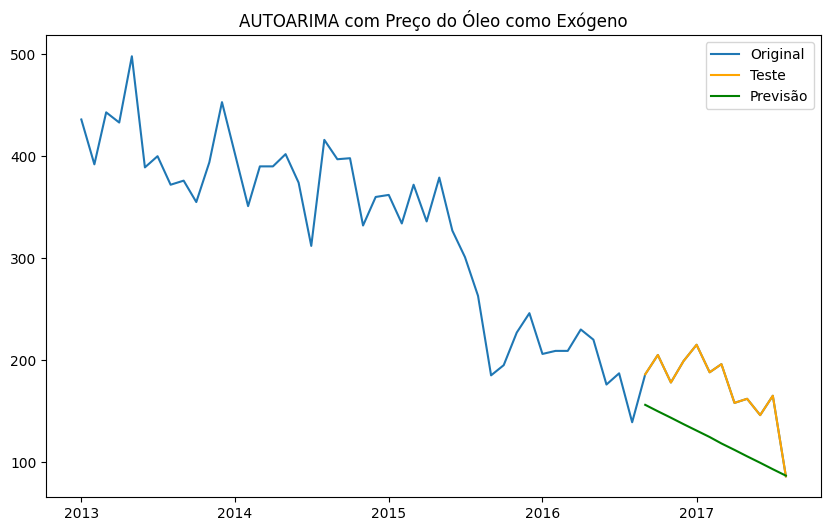

In [45]:
# using AUTOARIMA

ts = df_item[['year_month', 'unit_sales', 'onpromotion', 'oil_price']]
ts = ts.reset_index(drop=True)
ts['date'] = pd.to_datetime(ts['year_month'], format='%Y-%m')
ts = ts.set_index('date')
ts = ts.drop(columns=['year_month'])

train = ts.iloc[:-12]
test = ts.iloc[-12:]

# Correção na seleção de exógenos e na plotagem
model = auto_arima(train['unit_sales'], exogenous=train[['oil_price']], seasonal=True, m=12)
model.fit(train['unit_sales'], exogenous=train[['oil_price']])

# Ao prever, é necessário incluir os exógenos do conjunto de teste
forecast = model.predict(n_periods=len(test), exogenous=test[['oil_price']])

# Corrigindo a plotagem
plt.figure(figsize=(10, 6))
plt.plot(ts['unit_sales'], label='Original')
plt.plot(test.index, test['unit_sales'], label='Teste', color='orange')
plt.plot(test.index, forecast, label='Previsão', color='green')
plt.legend()
plt.title('AUTOARIMA com Preço do Óleo como Exógeno')
plt.show()